# Model Comparison

---

1. [VGG16](#vgg)
2. [Xception](#xception)
3. [ResNet50](#resnet)
4. [InceptionV3](#inception)

---

## 1. VGG16
<a id="vgg"></a> 

The botleneck features for the VGG16 deep learning are imported in the cell below for the training, validation and test datasets.

In [2]:
import numpy as np
from common import *

bottleneck_features = np.load('data/bottleneck_features/yelp_vgg16.npz')
train_vgg16 = bottleneck_features['train_features']
valid_vgg16 = bottleneck_features['valid_features']
test_vgg16 = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

A simple Convolutional Neural Network is created below. It is made of a global average pooling layer and a fully connected layer, where the latter contains one node for each label, i.e. 9, and is equipped with a `sigmoid` activation function. Note that this CNN takes the VGG16 bottleneck features as input.

In [3]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

vgg16 = Sequential()
vgg16.add(GlobalAveragePooling2D(input_shape=train_vgg16.shape[1:]) )
vgg16.add(Dense(9, activation='sigmoid') )

vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 4617      
Total params: 4,617
Trainable params: 4,617
Non-trainable params: 0
_________________________________________________________________


The CNN is then compiled and trained in the cells below.

In [4]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
vgg16.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_compare_vgg16.hdf5', save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_vgg16 = vgg16.fit(train_vgg16, train_targets, 
                          validation_data=(valid_vgg16,valid_targets), 
                          epochs=1000, batch_size=64, verbose=2,
                          callbacks=[checkpointer,checkimprovement])

Train on 20000 samples, validate on 2000 samples
Epoch 1/1000
 - 5s - loss: 1.8796 - acc: 0.5829 - val_loss: 1.6069 - val_acc: 0.6067
Epoch 2/1000
 - 4s - loss: 1.4886 - acc: 0.6132 - val_loss: 1.3916 - val_acc: 0.6233
Epoch 3/1000
 - 4s - loss: 1.3200 - acc: 0.6296 - val_loss: 1.2606 - val_acc: 0.6354
Epoch 4/1000
 - 4s - loss: 1.2120 - acc: 0.6410 - val_loss: 1.1767 - val_acc: 0.6413
Epoch 5/1000
 - 4s - loss: 1.1340 - acc: 0.6494 - val_loss: 1.1098 - val_acc: 0.6486
Epoch 6/1000
 - 4s - loss: 1.0741 - acc: 0.6553 - val_loss: 1.0576 - val_acc: 0.6541
Epoch 7/1000
 - 4s - loss: 1.0256 - acc: 0.6601 - val_loss: 1.0156 - val_acc: 0.6588
Epoch 8/1000
 - 4s - loss: 0.9852 - acc: 0.6639 - val_loss: 0.9794 - val_acc: 0.6643
Epoch 9/1000
 - 4s - loss: 0.9507 - acc: 0.6678 - val_loss: 0.9509 - val_acc: 0.6640
Epoch 10/1000
 - 4s - loss: 0.9212 - acc: 0.6704 - val_loss: 0.9220 - val_acc: 0.6699
Epoch 11/1000
 - 4s - loss: 0.8947 - acc: 0.6736 - val_loss: 0.9001 - val_acc: 0.6712
Epoch 12/1000


Epoch 96/1000
 - 2s - loss: 0.5098 - acc: 0.7468 - val_loss: 0.5385 - val_acc: 0.7277
Epoch 97/1000
 - 2s - loss: 0.5092 - acc: 0.7466 - val_loss: 0.5376 - val_acc: 0.7279
Epoch 98/1000
 - 2s - loss: 0.5086 - acc: 0.7469 - val_loss: 0.5373 - val_acc: 0.7290
Epoch 99/1000
 - 2s - loss: 0.5081 - acc: 0.7476 - val_loss: 0.5360 - val_acc: 0.7312
Epoch 100/1000
 - 2s - loss: 0.5075 - acc: 0.7469 - val_loss: 0.5358 - val_acc: 0.7281
Epoch 101/1000
 - 2s - loss: 0.5070 - acc: 0.7478 - val_loss: 0.5349 - val_acc: 0.7277
Epoch 102/1000
 - 2s - loss: 0.5064 - acc: 0.7477 - val_loss: 0.5350 - val_acc: 0.7293
Epoch 103/1000
 - 2s - loss: 0.5060 - acc: 0.7476 - val_loss: 0.5339 - val_acc: 0.7301
Epoch 104/1000
 - 2s - loss: 0.5054 - acc: 0.7478 - val_loss: 0.5339 - val_acc: 0.7294
Epoch 105/1000
 - 2s - loss: 0.5049 - acc: 0.7487 - val_loss: 0.5329 - val_acc: 0.7311
Epoch 106/1000
 - 2s - loss: 0.5046 - acc: 0.7489 - val_loss: 0.5324 - val_acc: 0.7297
Epoch 107/1000
 - 2s - loss: 0.5041 - acc: 0.74

Epoch 191/1000
 - 2s - loss: 0.4882 - acc: 0.7574 - val_loss: 0.5167 - val_acc: 0.7354
Epoch 192/1000
 - 2s - loss: 0.4879 - acc: 0.7580 - val_loss: 0.5159 - val_acc: 0.7363
Epoch 193/1000
 - 2s - loss: 0.4879 - acc: 0.7576 - val_loss: 0.5158 - val_acc: 0.7372
Epoch 194/1000
 - 2s - loss: 0.4878 - acc: 0.7576 - val_loss: 0.5159 - val_acc: 0.7358
Epoch 195/1000
 - 2s - loss: 0.4879 - acc: 0.7575 - val_loss: 0.5156 - val_acc: 0.7372
Epoch 196/1000
 - 2s - loss: 0.4879 - acc: 0.7575 - val_loss: 0.5161 - val_acc: 0.7381
Epoch 197/1000
 - 2s - loss: 0.4877 - acc: 0.7575 - val_loss: 0.5158 - val_acc: 0.7358
Epoch 198/1000
 - 2s - loss: 0.4876 - acc: 0.7582 - val_loss: 0.5161 - val_acc: 0.7364
Epoch 199/1000
 - 2s - loss: 0.4876 - acc: 0.7578 - val_loss: 0.5155 - val_acc: 0.7361
Epoch 200/1000
 - 2s - loss: 0.4875 - acc: 0.7576 - val_loss: 0.5164 - val_acc: 0.7361
Epoch 201/1000
 - 2s - loss: 0.4875 - acc: 0.7578 - val_loss: 0.5163 - val_acc: 0.7351
Epoch 202/1000
 - 2s - loss: 0.4875 - acc: 

 - 2s - loss: 0.4848 - acc: 0.7593 - val_loss: 0.5133 - val_acc: 0.7363
Epoch 286/1000
 - 2s - loss: 0.4848 - acc: 0.7596 - val_loss: 0.5131 - val_acc: 0.7383
Epoch 287/1000
 - 2s - loss: 0.4848 - acc: 0.7595 - val_loss: 0.5130 - val_acc: 0.7375
Epoch 288/1000
 - 2s - loss: 0.4848 - acc: 0.7597 - val_loss: 0.5130 - val_acc: 0.7364
Epoch 289/1000
 - 2s - loss: 0.4847 - acc: 0.7596 - val_loss: 0.5133 - val_acc: 0.7381
Epoch 290/1000
 - 2s - loss: 0.4848 - acc: 0.7593 - val_loss: 0.5130 - val_acc: 0.7372
Epoch 291/1000
 - 2s - loss: 0.4847 - acc: 0.7597 - val_loss: 0.5135 - val_acc: 0.7366
Epoch 292/1000
 - 2s - loss: 0.4848 - acc: 0.7597 - val_loss: 0.5129 - val_acc: 0.7373
Epoch 293/1000
 - 2s - loss: 0.4846 - acc: 0.7596 - val_loss: 0.5139 - val_acc: 0.7363
Epoch 294/1000
 - 2s - loss: 0.4847 - acc: 0.7595 - val_loss: 0.5129 - val_acc: 0.7376
Epoch 295/1000
 - 2s - loss: 0.4846 - acc: 0.7597 - val_loss: 0.5134 - val_acc: 0.7362
Epoch 296/1000
 - 2s - loss: 0.4846 - acc: 0.7597 - val_lo

Epoch 380/1000
 - 2s - loss: 0.4840 - acc: 0.7603 - val_loss: 0.5129 - val_acc: 0.7377
Epoch 381/1000
 - 2s - loss: 0.4839 - acc: 0.7603 - val_loss: 0.5122 - val_acc: 0.7388
Epoch 382/1000
 - 2s - loss: 0.4839 - acc: 0.7601 - val_loss: 0.5133 - val_acc: 0.7376
Epoch 383/1000
 - 2s - loss: 0.4840 - acc: 0.7601 - val_loss: 0.5126 - val_acc: 0.7376
Epoch 384/1000
 - 2s - loss: 0.4837 - acc: 0.7609 - val_loss: 0.5125 - val_acc: 0.7377
Epoch 385/1000
 - 2s - loss: 0.4838 - acc: 0.7602 - val_loss: 0.5132 - val_acc: 0.7365


The loss and accuracy across epochs for the training and validation data are plotted.

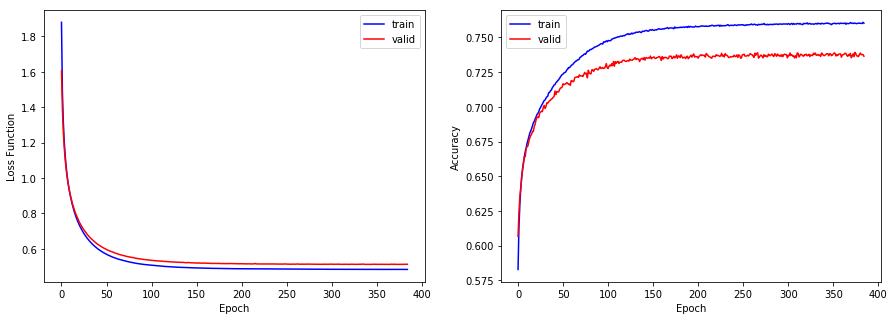

In [6]:
history(history_vgg16)

In [7]:
vgg16.load_weights('data/saved_models/weights_compare_vgg16.hdf5')

The predictions on the test dataset are calculated and the $F_1$ score is derived.

In [8]:
vgg16_predictions = (vgg16.predict(test_vgg16) >= 0.5).astype(int)

In [9]:
vgg16_score = f1_score(test_targets, vgg16_predictions)
print('F1 score: %.5f' % vgg16_score)

F1 score: 0.75342


## 2. Xception
<a id="xception"></a> 

In [10]:
import numpy as np
from common import *

bottleneck_features = np.load('data/bottleneck_features/yelp_xception.npz')
train_xception = bottleneck_features['train_features']
valid_xception = bottleneck_features['valid_features']
test_xception = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

In [11]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

xception = Sequential()
xception.add(GlobalAveragePooling2D(input_shape=train_xception.shape[1:]) )
xception.add(Dense(9, activation='sigmoid') )

xception.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 18441     
Total params: 18,441
Trainable params: 18,441
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
xception.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_compare_xception.hdf5', save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_xception = xception.fit(train_xception, train_targets, 
                                validation_data=(valid_xception,valid_targets), 
                                epochs=1000, batch_size=64, verbose=2,
                                callbacks=[checkpointer,checkimprovement])

Train on 20000 samples, validate on 2000 samples
Epoch 1/1000
 - 4s - loss: 0.6859 - acc: 0.5623 - val_loss: 0.6536 - val_acc: 0.6224
Epoch 2/1000
 - 4s - loss: 0.6447 - acc: 0.6303 - val_loss: 0.6342 - val_acc: 0.6433
Epoch 3/1000
 - 4s - loss: 0.6334 - acc: 0.6404 - val_loss: 0.6263 - val_acc: 0.6502
Epoch 4/1000
 - 4s - loss: 0.6275 - acc: 0.6459 - val_loss: 0.6212 - val_acc: 0.6542
Epoch 5/1000
 - 4s - loss: 0.6229 - acc: 0.6497 - val_loss: 0.6169 - val_acc: 0.6581
Epoch 6/1000
 - 4s - loss: 0.6188 - acc: 0.6535 - val_loss: 0.6131 - val_acc: 0.6616
Epoch 7/1000
 - 4s - loss: 0.6150 - acc: 0.6572 - val_loss: 0.6097 - val_acc: 0.6643
Epoch 8/1000
 - 4s - loss: 0.6115 - acc: 0.6606 - val_loss: 0.6065 - val_acc: 0.6664
Epoch 9/1000
 - 4s - loss: 0.6082 - acc: 0.6639 - val_loss: 0.6036 - val_acc: 0.6687
Epoch 10/1000
 - 4s - loss: 0.6052 - acc: 0.6668 - val_loss: 0.6008 - val_acc: 0.6716
Epoch 11/1000
 - 5s - loss: 0.6023 - acc: 0.6696 - val_loss: 0.5982 - val_acc: 0.6733
Epoch 12/1000


Epoch 96/1000
 - 4s - loss: 0.5359 - acc: 0.7209 - val_loss: 0.5400 - val_acc: 0.7164
Epoch 97/1000
 - 4s - loss: 0.5357 - acc: 0.7211 - val_loss: 0.5398 - val_acc: 0.7166
Epoch 98/1000
 - 4s - loss: 0.5354 - acc: 0.7213 - val_loss: 0.5396 - val_acc: 0.7164
Epoch 99/1000
 - 4s - loss: 0.5352 - acc: 0.7213 - val_loss: 0.5394 - val_acc: 0.7166
Epoch 100/1000
 - 4s - loss: 0.5350 - acc: 0.7216 - val_loss: 0.5392 - val_acc: 0.7168
Epoch 101/1000
 - 4s - loss: 0.5348 - acc: 0.7217 - val_loss: 0.5390 - val_acc: 0.7169
Epoch 102/1000
 - 4s - loss: 0.5345 - acc: 0.7219 - val_loss: 0.5389 - val_acc: 0.7168
Epoch 103/1000
 - 4s - loss: 0.5343 - acc: 0.7220 - val_loss: 0.5387 - val_acc: 0.7168
Epoch 104/1000
 - 4s - loss: 0.5341 - acc: 0.7221 - val_loss: 0.5385 - val_acc: 0.7166
Epoch 105/1000
 - 4s - loss: 0.5339 - acc: 0.7223 - val_loss: 0.5383 - val_acc: 0.7166
Epoch 106/1000
 - 4s - loss: 0.5337 - acc: 0.7224 - val_loss: 0.5382 - val_acc: 0.7169
Epoch 107/1000
 - 4s - loss: 0.5335 - acc: 0.72

Epoch 191/1000
 - 4s - loss: 0.5217 - acc: 0.7308 - val_loss: 0.5289 - val_acc: 0.7246
Epoch 192/1000
 - 4s - loss: 0.5216 - acc: 0.7309 - val_loss: 0.5288 - val_acc: 0.7247
Epoch 193/1000
 - 4s - loss: 0.5215 - acc: 0.7311 - val_loss: 0.5288 - val_acc: 0.7245
Epoch 194/1000
 - 4s - loss: 0.5214 - acc: 0.7311 - val_loss: 0.5287 - val_acc: 0.7247
Epoch 195/1000
 - 4s - loss: 0.5213 - acc: 0.7310 - val_loss: 0.5286 - val_acc: 0.7246
Epoch 196/1000
 - 4s - loss: 0.5212 - acc: 0.7312 - val_loss: 0.5285 - val_acc: 0.7245
Epoch 197/1000
 - 4s - loss: 0.5211 - acc: 0.7314 - val_loss: 0.5285 - val_acc: 0.7247
Epoch 198/1000
 - 4s - loss: 0.5210 - acc: 0.7315 - val_loss: 0.5284 - val_acc: 0.7248
Epoch 199/1000
 - 4s - loss: 0.5209 - acc: 0.7316 - val_loss: 0.5283 - val_acc: 0.7249
Epoch 200/1000
 - 4s - loss: 0.5208 - acc: 0.7314 - val_loss: 0.5282 - val_acc: 0.7249
Epoch 201/1000
 - 4s - loss: 0.5207 - acc: 0.7315 - val_loss: 0.5282 - val_acc: 0.7246
Epoch 202/1000
 - 4s - loss: 0.5206 - acc: 

 - 4s - loss: 0.5143 - acc: 0.7367 - val_loss: 0.5235 - val_acc: 0.7285
Epoch 286/1000
 - 4s - loss: 0.5143 - acc: 0.7367 - val_loss: 0.5234 - val_acc: 0.7285
Epoch 287/1000
 - 4s - loss: 0.5142 - acc: 0.7368 - val_loss: 0.5234 - val_acc: 0.7286
Epoch 288/1000
 - 4s - loss: 0.5142 - acc: 0.7370 - val_loss: 0.5234 - val_acc: 0.7286
Epoch 289/1000
 - 4s - loss: 0.5141 - acc: 0.7371 - val_loss: 0.5233 - val_acc: 0.7288
Epoch 290/1000
 - 4s - loss: 0.5140 - acc: 0.7370 - val_loss: 0.5233 - val_acc: 0.7288
Epoch 291/1000
 - 4s - loss: 0.5140 - acc: 0.7371 - val_loss: 0.5232 - val_acc: 0.7287
Epoch 292/1000
 - 4s - loss: 0.5139 - acc: 0.7371 - val_loss: 0.5232 - val_acc: 0.7288
Epoch 293/1000
 - 4s - loss: 0.5139 - acc: 0.7371 - val_loss: 0.5231 - val_acc: 0.7288
Epoch 294/1000
 - 4s - loss: 0.5138 - acc: 0.7372 - val_loss: 0.5231 - val_acc: 0.7289
Epoch 295/1000
 - 4s - loss: 0.5137 - acc: 0.7372 - val_loss: 0.5231 - val_acc: 0.7288
Epoch 296/1000
 - 4s - loss: 0.5137 - acc: 0.7374 - val_lo

Epoch 380/1000
 - 4s - loss: 0.5093 - acc: 0.7411 - val_loss: 0.5199 - val_acc: 0.7303
Epoch 381/1000
 - 4s - loss: 0.5093 - acc: 0.7412 - val_loss: 0.5199 - val_acc: 0.7304
Epoch 382/1000
 - 4s - loss: 0.5093 - acc: 0.7412 - val_loss: 0.5199 - val_acc: 0.7304
Epoch 383/1000
 - 4s - loss: 0.5092 - acc: 0.7414 - val_loss: 0.5199 - val_acc: 0.7304
Epoch 384/1000
 - 4s - loss: 0.5092 - acc: 0.7414 - val_loss: 0.5198 - val_acc: 0.7303
Epoch 385/1000
 - 4s - loss: 0.5091 - acc: 0.7414 - val_loss: 0.5198 - val_acc: 0.7306
Epoch 386/1000
 - 4s - loss: 0.5091 - acc: 0.7413 - val_loss: 0.5198 - val_acc: 0.7308
Epoch 387/1000
 - 4s - loss: 0.5090 - acc: 0.7413 - val_loss: 0.5198 - val_acc: 0.7305
Epoch 388/1000
 - 4s - loss: 0.5090 - acc: 0.7415 - val_loss: 0.5197 - val_acc: 0.7306
Epoch 389/1000
 - 4s - loss: 0.5089 - acc: 0.7414 - val_loss: 0.5197 - val_acc: 0.7306
Epoch 390/1000
 - 4s - loss: 0.5089 - acc: 0.7415 - val_loss: 0.5197 - val_acc: 0.7307
Epoch 391/1000
 - 4s - loss: 0.5089 - acc: 

 - 5s - loss: 0.5056 - acc: 0.7436 - val_loss: 0.5175 - val_acc: 0.7332
Epoch 475/1000
 - 4s - loss: 0.5056 - acc: 0.7436 - val_loss: 0.5174 - val_acc: 0.7334
Epoch 476/1000
 - 4s - loss: 0.5055 - acc: 0.7437 - val_loss: 0.5174 - val_acc: 0.7334
Epoch 477/1000
 - 4s - loss: 0.5055 - acc: 0.7437 - val_loss: 0.5174 - val_acc: 0.7333
Epoch 478/1000
 - 4s - loss: 0.5055 - acc: 0.7437 - val_loss: 0.5174 - val_acc: 0.7333
Epoch 479/1000
 - 4s - loss: 0.5054 - acc: 0.7438 - val_loss: 0.5173 - val_acc: 0.7332
Epoch 480/1000
 - 4s - loss: 0.5054 - acc: 0.7437 - val_loss: 0.5173 - val_acc: 0.7332
Epoch 481/1000
 - 4s - loss: 0.5054 - acc: 0.7437 - val_loss: 0.5173 - val_acc: 0.7332
Epoch 482/1000
 - 4s - loss: 0.5053 - acc: 0.7438 - val_loss: 0.5173 - val_acc: 0.7332
Epoch 483/1000
 - 4s - loss: 0.5053 - acc: 0.7438 - val_loss: 0.5172 - val_acc: 0.7334
Epoch 484/1000
 - 4s - loss: 0.5053 - acc: 0.7438 - val_loss: 0.5172 - val_acc: 0.7333
Epoch 485/1000
 - 4s - loss: 0.5052 - acc: 0.7439 - val_lo

Epoch 569/1000
 - 4s - loss: 0.5026 - acc: 0.7461 - val_loss: 0.5155 - val_acc: 0.7343
Epoch 570/1000
 - 4s - loss: 0.5026 - acc: 0.7461 - val_loss: 0.5155 - val_acc: 0.7343
Epoch 571/1000
 - 4s - loss: 0.5026 - acc: 0.7462 - val_loss: 0.5155 - val_acc: 0.7340
Epoch 572/1000
 - 4s - loss: 0.5025 - acc: 0.7462 - val_loss: 0.5155 - val_acc: 0.7341
Epoch 573/1000
 - 4s - loss: 0.5025 - acc: 0.7461 - val_loss: 0.5154 - val_acc: 0.7341
Epoch 574/1000
 - 4s - loss: 0.5025 - acc: 0.7461 - val_loss: 0.5154 - val_acc: 0.7341
Epoch 575/1000
 - 4s - loss: 0.5024 - acc: 0.7462 - val_loss: 0.5154 - val_acc: 0.7340
Epoch 576/1000
 - 4s - loss: 0.5024 - acc: 0.7462 - val_loss: 0.5154 - val_acc: 0.7343
Epoch 577/1000
 - 4s - loss: 0.5024 - acc: 0.7462 - val_loss: 0.5154 - val_acc: 0.7341
Epoch 578/1000
 - 4s - loss: 0.5024 - acc: 0.7463 - val_loss: 0.5153 - val_acc: 0.7343
Epoch 579/1000
 - 4s - loss: 0.5023 - acc: 0.7463 - val_loss: 0.5153 - val_acc: 0.7343
Epoch 580/1000
 - 4s - loss: 0.5023 - acc: 

 - 4s - loss: 0.5001 - acc: 0.7479 - val_loss: 0.5140 - val_acc: 0.7346
Epoch 664/1000
 - 4s - loss: 0.5001 - acc: 0.7480 - val_loss: 0.5140 - val_acc: 0.7346
Epoch 665/1000
 - 4s - loss: 0.5001 - acc: 0.7480 - val_loss: 0.5139 - val_acc: 0.7347
Epoch 666/1000
 - 4s - loss: 0.5001 - acc: 0.7481 - val_loss: 0.5139 - val_acc: 0.7346
Epoch 667/1000
 - 4s - loss: 0.5000 - acc: 0.7480 - val_loss: 0.5139 - val_acc: 0.7347
Epoch 668/1000
 - 4s - loss: 0.5000 - acc: 0.7481 - val_loss: 0.5139 - val_acc: 0.7347
Epoch 669/1000
 - 4s - loss: 0.5000 - acc: 0.7481 - val_loss: 0.5139 - val_acc: 0.7347
Epoch 670/1000
 - 4s - loss: 0.5000 - acc: 0.7481 - val_loss: 0.5139 - val_acc: 0.7347
Epoch 671/1000
 - 4s - loss: 0.4999 - acc: 0.7481 - val_loss: 0.5139 - val_acc: 0.7348
Epoch 672/1000
 - 4s - loss: 0.4999 - acc: 0.7482 - val_loss: 0.5138 - val_acc: 0.7347
Epoch 673/1000
 - 4s - loss: 0.4999 - acc: 0.7481 - val_loss: 0.5138 - val_acc: 0.7347
Epoch 674/1000
 - 4s - loss: 0.4999 - acc: 0.7482 - val_lo

Epoch 758/1000
 - 4s - loss: 0.4980 - acc: 0.7496 - val_loss: 0.5127 - val_acc: 0.7354
Epoch 759/1000
 - 4s - loss: 0.4980 - acc: 0.7496 - val_loss: 0.5127 - val_acc: 0.7354
Epoch 760/1000
 - 4s - loss: 0.4979 - acc: 0.7496 - val_loss: 0.5127 - val_acc: 0.7355
Epoch 761/1000
 - 4s - loss: 0.4979 - acc: 0.7496 - val_loss: 0.5127 - val_acc: 0.7354
Epoch 762/1000
 - 4s - loss: 0.4979 - acc: 0.7496 - val_loss: 0.5127 - val_acc: 0.7356
Epoch 763/1000
 - 4s - loss: 0.4979 - acc: 0.7496 - val_loss: 0.5127 - val_acc: 0.7356
Epoch 764/1000
 - 4s - loss: 0.4979 - acc: 0.7496 - val_loss: 0.5127 - val_acc: 0.7353
Epoch 765/1000
 - 4s - loss: 0.4978 - acc: 0.7497 - val_loss: 0.5126 - val_acc: 0.7353
Epoch 766/1000
 - 4s - loss: 0.4978 - acc: 0.7497 - val_loss: 0.5126 - val_acc: 0.7354
Epoch 767/1000
 - 4s - loss: 0.4978 - acc: 0.7497 - val_loss: 0.5126 - val_acc: 0.7356
Epoch 768/1000
 - 4s - loss: 0.4978 - acc: 0.7498 - val_loss: 0.5126 - val_acc: 0.7356
Epoch 769/1000
 - 4s - loss: 0.4978 - acc: 

 - 4s - loss: 0.4961 - acc: 0.7511 - val_loss: 0.5117 - val_acc: 0.7364
Epoch 853/1000
 - 4s - loss: 0.4961 - acc: 0.7511 - val_loss: 0.5117 - val_acc: 0.7363
Epoch 854/1000
 - 5s - loss: 0.4961 - acc: 0.7512 - val_loss: 0.5116 - val_acc: 0.7364
Epoch 855/1000
 - 4s - loss: 0.4961 - acc: 0.7511 - val_loss: 0.5116 - val_acc: 0.7361
Epoch 856/1000
 - 4s - loss: 0.4961 - acc: 0.7512 - val_loss: 0.5116 - val_acc: 0.7363
Epoch 857/1000
 - 4s - loss: 0.4960 - acc: 0.7510 - val_loss: 0.5116 - val_acc: 0.7361
Epoch 858/1000
 - 4s - loss: 0.4960 - acc: 0.7511 - val_loss: 0.5116 - val_acc: 0.7362
Epoch 859/1000
 - 4s - loss: 0.4960 - acc: 0.7511 - val_loss: 0.5116 - val_acc: 0.7364
Epoch 860/1000
 - 4s - loss: 0.4960 - acc: 0.7512 - val_loss: 0.5116 - val_acc: 0.7361
Epoch 861/1000
 - 4s - loss: 0.4960 - acc: 0.7511 - val_loss: 0.5116 - val_acc: 0.7362
Epoch 862/1000
 - 4s - loss: 0.4960 - acc: 0.7512 - val_loss: 0.5116 - val_acc: 0.7362
Epoch 863/1000
 - 4s - loss: 0.4959 - acc: 0.7512 - val_lo

Epoch 947/1000
 - 4s - loss: 0.4945 - acc: 0.7523 - val_loss: 0.5108 - val_acc: 0.7373
Epoch 948/1000
 - 4s - loss: 0.4945 - acc: 0.7523 - val_loss: 0.5108 - val_acc: 0.7373
Epoch 949/1000
 - 4s - loss: 0.4944 - acc: 0.7525 - val_loss: 0.5108 - val_acc: 0.7373
Epoch 950/1000
 - 4s - loss: 0.4944 - acc: 0.7524 - val_loss: 0.5107 - val_acc: 0.7372
Epoch 951/1000
 - 4s - loss: 0.4944 - acc: 0.7525 - val_loss: 0.5107 - val_acc: 0.7373
Epoch 952/1000
 - 4s - loss: 0.4944 - acc: 0.7524 - val_loss: 0.5107 - val_acc: 0.7373
Epoch 953/1000
 - 4s - loss: 0.4944 - acc: 0.7524 - val_loss: 0.5107 - val_acc: 0.7374
Epoch 954/1000
 - 4s - loss: 0.4944 - acc: 0.7525 - val_loss: 0.5107 - val_acc: 0.7373
Epoch 955/1000
 - 4s - loss: 0.4943 - acc: 0.7525 - val_loss: 0.5107 - val_acc: 0.7375
Epoch 956/1000
 - 4s - loss: 0.4943 - acc: 0.7525 - val_loss: 0.5107 - val_acc: 0.7376
Epoch 957/1000
 - 4s - loss: 0.4943 - acc: 0.7525 - val_loss: 0.5107 - val_acc: 0.7372
Epoch 958/1000
 - 4s - loss: 0.4943 - acc: 

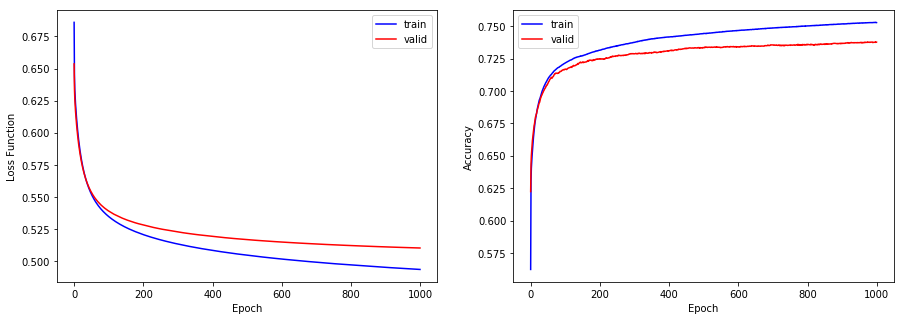

In [14]:
history(history_xception)

In [15]:
xception.load_weights('data/saved_models/weights_compare_xception.hdf5')

In [16]:
xception_predictions = (xception.predict(test_xception) >= 0.5).astype(int)

In [17]:
xception_score = f1_score(test_targets, xception_predictions)
print('F1 score: %.5f' % xception_score)

F1 score: 0.75009


## 3. ResNet50
<a id="resnet"></a> 

In [18]:
import numpy as np
from common import *

bottleneck_features = np.load('data/bottleneck_features/yelp_resnet50.npz')
train_resnet50 = bottleneck_features['train_features']
valid_resnet50 = bottleneck_features['valid_features']
test_resnet50 = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

In [19]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

resnet50 = Sequential()
resnet50.add(GlobalAveragePooling2D(input_shape=train_resnet50.shape[1:]))
resnet50.add(Dense(9, activation='sigmoid'))

resnet50.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 18441     
Total params: 18,441
Trainable params: 18,441
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
resnet50.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_compare_resnet50.hdf5', save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_resnet50 = resnet50.fit(train_resnet50, train_targets, 
                                validation_data=(valid_resnet50,valid_targets), 
                                epochs=1000, batch_size=64, verbose=2,
                                callbacks=[checkpointer,checkimprovement])

Train on 20000 samples, validate on 2000 samples
Epoch 1/1000
 - 1s - loss: 0.7017 - acc: 0.6027 - val_loss: 0.6678 - val_acc: 0.6334
Epoch 2/1000
 - 1s - loss: 0.6615 - acc: 0.6380 - val_loss: 0.6452 - val_acc: 0.6502
Epoch 3/1000
 - 1s - loss: 0.6399 - acc: 0.6529 - val_loss: 0.6284 - val_acc: 0.6627
Epoch 4/1000
 - 1s - loss: 0.6231 - acc: 0.6632 - val_loss: 0.6149 - val_acc: 0.6722
Epoch 5/1000
 - 1s - loss: 0.6097 - acc: 0.6718 - val_loss: 0.6042 - val_acc: 0.6787
Epoch 6/1000
 - 1s - loss: 0.5989 - acc: 0.6792 - val_loss: 0.5955 - val_acc: 0.6847
Epoch 7/1000
 - 1s - loss: 0.5900 - acc: 0.6854 - val_loss: 0.5884 - val_acc: 0.6899
Epoch 8/1000
 - 1s - loss: 0.5824 - acc: 0.6904 - val_loss: 0.5824 - val_acc: 0.6934
Epoch 9/1000
 - 1s - loss: 0.5761 - acc: 0.6945 - val_loss: 0.5775 - val_acc: 0.6959
Epoch 10/1000
 - 1s - loss: 0.5706 - acc: 0.6977 - val_loss: 0.5729 - val_acc: 0.6983
Epoch 11/1000
 - 1s - loss: 0.5658 - acc: 0.7011 - val_loss: 0.5691 - val_acc: 0.7018
Epoch 12/1000


Epoch 96/1000
 - 1s - loss: 0.4946 - acc: 0.7508 - val_loss: 0.5128 - val_acc: 0.7391
Epoch 97/1000
 - 1s - loss: 0.4943 - acc: 0.7509 - val_loss: 0.5125 - val_acc: 0.7391
Epoch 98/1000
 - 1s - loss: 0.4941 - acc: 0.7513 - val_loss: 0.5125 - val_acc: 0.7388
Epoch 99/1000
 - 1s - loss: 0.4938 - acc: 0.7512 - val_loss: 0.5123 - val_acc: 0.7390
Epoch 100/1000
 - 1s - loss: 0.4936 - acc: 0.7514 - val_loss: 0.5121 - val_acc: 0.7389
Epoch 101/1000
 - 1s - loss: 0.4933 - acc: 0.7516 - val_loss: 0.5119 - val_acc: 0.7392
Epoch 102/1000
 - 1s - loss: 0.4931 - acc: 0.7521 - val_loss: 0.5117 - val_acc: 0.7391
Epoch 103/1000
 - 1s - loss: 0.4929 - acc: 0.7520 - val_loss: 0.5115 - val_acc: 0.7389
Epoch 104/1000
 - 1s - loss: 0.4926 - acc: 0.7521 - val_loss: 0.5114 - val_acc: 0.7389
Epoch 105/1000
 - 1s - loss: 0.4924 - acc: 0.7522 - val_loss: 0.5112 - val_acc: 0.7384
Epoch 106/1000
 - 1s - loss: 0.4922 - acc: 0.7524 - val_loss: 0.5110 - val_acc: 0.7388
Epoch 107/1000
 - 1s - loss: 0.4919 - acc: 0.75

Epoch 191/1000
 - 1s - loss: 0.4783 - acc: 0.7615 - val_loss: 0.5020 - val_acc: 0.7441
Epoch 192/1000
 - 1s - loss: 0.4782 - acc: 0.7619 - val_loss: 0.5018 - val_acc: 0.7439
Epoch 193/1000
 - 1s - loss: 0.4781 - acc: 0.7620 - val_loss: 0.5017 - val_acc: 0.7439
Epoch 194/1000
 - 1s - loss: 0.4779 - acc: 0.7620 - val_loss: 0.5017 - val_acc: 0.7446
Epoch 195/1000
 - 1s - loss: 0.4778 - acc: 0.7620 - val_loss: 0.5016 - val_acc: 0.7441
Epoch 196/1000
 - 1s - loss: 0.4777 - acc: 0.7622 - val_loss: 0.5015 - val_acc: 0.7443
Epoch 197/1000
 - 1s - loss: 0.4776 - acc: 0.7624 - val_loss: 0.5015 - val_acc: 0.7444
Epoch 198/1000
 - 1s - loss: 0.4775 - acc: 0.7622 - val_loss: 0.5016 - val_acc: 0.7442
Epoch 199/1000
 - 1s - loss: 0.4774 - acc: 0.7625 - val_loss: 0.5013 - val_acc: 0.7444
Epoch 200/1000
 - 1s - loss: 0.4773 - acc: 0.7625 - val_loss: 0.5013 - val_acc: 0.7441
Epoch 201/1000
 - 1s - loss: 0.4771 - acc: 0.7626 - val_loss: 0.5012 - val_acc: 0.7448
Epoch 202/1000
 - 1s - loss: 0.4770 - acc: 

 - 1s - loss: 0.4692 - acc: 0.7686 - val_loss: 0.4967 - val_acc: 0.7475
Epoch 286/1000
 - 1s - loss: 0.4692 - acc: 0.7686 - val_loss: 0.4968 - val_acc: 0.7462
Epoch 287/1000
 - 1s - loss: 0.4691 - acc: 0.7686 - val_loss: 0.4967 - val_acc: 0.7472
Epoch 288/1000
 - 1s - loss: 0.4690 - acc: 0.7687 - val_loss: 0.4966 - val_acc: 0.7469
Epoch 289/1000
 - 1s - loss: 0.4689 - acc: 0.7688 - val_loss: 0.4966 - val_acc: 0.7474
Epoch 290/1000
 - 1s - loss: 0.4689 - acc: 0.7687 - val_loss: 0.4966 - val_acc: 0.7468
Epoch 291/1000
 - 1s - loss: 0.4688 - acc: 0.7690 - val_loss: 0.4966 - val_acc: 0.7470
Epoch 292/1000
 - 1s - loss: 0.4687 - acc: 0.7688 - val_loss: 0.4964 - val_acc: 0.7469
Epoch 293/1000
 - 1s - loss: 0.4686 - acc: 0.7691 - val_loss: 0.4964 - val_acc: 0.7474
Epoch 294/1000
 - 1s - loss: 0.4686 - acc: 0.7692 - val_loss: 0.4964 - val_acc: 0.7473
Epoch 295/1000
 - 1s - loss: 0.4685 - acc: 0.7693 - val_loss: 0.4964 - val_acc: 0.7469
Epoch 296/1000
 - 1s - loss: 0.4684 - acc: 0.7692 - val_lo

Epoch 380/1000
 - 1s - loss: 0.4629 - acc: 0.7733 - val_loss: 0.4937 - val_acc: 0.7490
Epoch 381/1000
 - 1s - loss: 0.4628 - acc: 0.7733 - val_loss: 0.4936 - val_acc: 0.7490
Epoch 382/1000
 - 1s - loss: 0.4628 - acc: 0.7730 - val_loss: 0.4936 - val_acc: 0.7492
Epoch 383/1000
 - 1s - loss: 0.4627 - acc: 0.7733 - val_loss: 0.4935 - val_acc: 0.7493
Epoch 384/1000
 - 1s - loss: 0.4627 - acc: 0.7734 - val_loss: 0.4935 - val_acc: 0.7490
Epoch 385/1000
 - 1s - loss: 0.4626 - acc: 0.7732 - val_loss: 0.4936 - val_acc: 0.7498
Epoch 386/1000
 - 1s - loss: 0.4626 - acc: 0.7733 - val_loss: 0.4936 - val_acc: 0.7499
Epoch 387/1000
 - 1s - loss: 0.4625 - acc: 0.7734 - val_loss: 0.4934 - val_acc: 0.7498
Epoch 388/1000
 - 1s - loss: 0.4624 - acc: 0.7735 - val_loss: 0.4935 - val_acc: 0.7497
Epoch 389/1000
 - 1s - loss: 0.4624 - acc: 0.7733 - val_loss: 0.4934 - val_acc: 0.7498
Epoch 390/1000
 - 1s - loss: 0.4623 - acc: 0.7736 - val_loss: 0.4934 - val_acc: 0.7494
Epoch 391/1000
 - 1s - loss: 0.4623 - acc: 

 - 1s - loss: 0.4581 - acc: 0.7765 - val_loss: 0.4917 - val_acc: 0.7516
Epoch 475/1000
 - 1s - loss: 0.4581 - acc: 0.7764 - val_loss: 0.4916 - val_acc: 0.7508
Epoch 476/1000
 - 1s - loss: 0.4581 - acc: 0.7764 - val_loss: 0.4916 - val_acc: 0.7519
Epoch 477/1000
 - 1s - loss: 0.4580 - acc: 0.7764 - val_loss: 0.4916 - val_acc: 0.7516
Epoch 478/1000
 - 1s - loss: 0.4579 - acc: 0.7765 - val_loss: 0.4916 - val_acc: 0.7517
Epoch 479/1000
 - 1s - loss: 0.4579 - acc: 0.7764 - val_loss: 0.4916 - val_acc: 0.7513
Epoch 480/1000
 - 1s - loss: 0.4579 - acc: 0.7768 - val_loss: 0.4916 - val_acc: 0.7518
Epoch 481/1000
 - 1s - loss: 0.4578 - acc: 0.7765 - val_loss: 0.4916 - val_acc: 0.7514
Epoch 482/1000
 - 1s - loss: 0.4578 - acc: 0.7767 - val_loss: 0.4915 - val_acc: 0.7512
Epoch 483/1000
 - 1s - loss: 0.4577 - acc: 0.7767 - val_loss: 0.4915 - val_acc: 0.7514
Epoch 484/1000
 - 1s - loss: 0.4577 - acc: 0.7765 - val_loss: 0.4915 - val_acc: 0.7513
Epoch 485/1000
 - 1s - loss: 0.4576 - acc: 0.7769 - val_lo

Epoch 569/1000
 - 1s - loss: 0.4543 - acc: 0.7791 - val_loss: 0.4903 - val_acc: 0.7518
Epoch 570/1000
 - 1s - loss: 0.4542 - acc: 0.7789 - val_loss: 0.4903 - val_acc: 0.7521
Epoch 571/1000
 - 1s - loss: 0.4542 - acc: 0.7792 - val_loss: 0.4903 - val_acc: 0.7521
Epoch 572/1000
 - 1s - loss: 0.4542 - acc: 0.7791 - val_loss: 0.4903 - val_acc: 0.7521
Epoch 573/1000
 - 1s - loss: 0.4541 - acc: 0.7793 - val_loss: 0.4902 - val_acc: 0.7524
Epoch 574/1000
 - 1s - loss: 0.4541 - acc: 0.7792 - val_loss: 0.4903 - val_acc: 0.7519
Epoch 575/1000
 - 1s - loss: 0.4540 - acc: 0.7793 - val_loss: 0.4901 - val_acc: 0.7519
Epoch 576/1000
 - 1s - loss: 0.4540 - acc: 0.7792 - val_loss: 0.4902 - val_acc: 0.7514
Epoch 577/1000
 - 1s - loss: 0.4540 - acc: 0.7795 - val_loss: 0.4902 - val_acc: 0.7518
Epoch 578/1000
 - 1s - loss: 0.4540 - acc: 0.7793 - val_loss: 0.4902 - val_acc: 0.7522
Epoch 579/1000
 - 1s - loss: 0.4539 - acc: 0.7793 - val_loss: 0.4902 - val_acc: 0.7523
Epoch 580/1000
 - 1s - loss: 0.4539 - acc: 

 - 1s - loss: 0.4511 - acc: 0.7813 - val_loss: 0.4894 - val_acc: 0.7534
Epoch 664/1000
 - 1s - loss: 0.4511 - acc: 0.7815 - val_loss: 0.4894 - val_acc: 0.7534
Epoch 665/1000
 - 1s - loss: 0.4510 - acc: 0.7814 - val_loss: 0.4893 - val_acc: 0.7532
Epoch 666/1000
 - 1s - loss: 0.4510 - acc: 0.7815 - val_loss: 0.4893 - val_acc: 0.7536
Epoch 667/1000
 - 1s - loss: 0.4510 - acc: 0.7815 - val_loss: 0.4892 - val_acc: 0.7532
Epoch 668/1000
 - 1s - loss: 0.4510 - acc: 0.7813 - val_loss: 0.4893 - val_acc: 0.7538
Epoch 669/1000
 - 1s - loss: 0.4509 - acc: 0.7815 - val_loss: 0.4893 - val_acc: 0.7539
Epoch 670/1000
 - 1s - loss: 0.4509 - acc: 0.7814 - val_loss: 0.4892 - val_acc: 0.7538
Epoch 671/1000
 - 1s - loss: 0.4509 - acc: 0.7816 - val_loss: 0.4893 - val_acc: 0.7537
Epoch 672/1000
 - 1s - loss: 0.4508 - acc: 0.7815 - val_loss: 0.4892 - val_acc: 0.7532
Epoch 673/1000
 - 1s - loss: 0.4508 - acc: 0.7816 - val_loss: 0.4893 - val_acc: 0.7537
Epoch 674/1000
 - 1s - loss: 0.4508 - acc: 0.7815 - val_lo

Epoch 758/1000
 - 1s - loss: 0.4484 - acc: 0.7829 - val_loss: 0.4887 - val_acc: 0.7543
Epoch 759/1000
 - 1s - loss: 0.4484 - acc: 0.7831 - val_loss: 0.4888 - val_acc: 0.7542
Epoch 760/1000
 - 1s - loss: 0.4483 - acc: 0.7832 - val_loss: 0.4886 - val_acc: 0.7539
Epoch 761/1000
 - 1s - loss: 0.4483 - acc: 0.7831 - val_loss: 0.4886 - val_acc: 0.7541
Epoch 762/1000
 - 1s - loss: 0.4483 - acc: 0.7831 - val_loss: 0.4887 - val_acc: 0.7541
Epoch 763/1000
 - 1s - loss: 0.4483 - acc: 0.7832 - val_loss: 0.4886 - val_acc: 0.7542
Epoch 764/1000
 - 1s - loss: 0.4482 - acc: 0.7830 - val_loss: 0.4886 - val_acc: 0.7542
Epoch 765/1000
 - 1s - loss: 0.4482 - acc: 0.7832 - val_loss: 0.4887 - val_acc: 0.7541
Epoch 766/1000
 - 1s - loss: 0.4482 - acc: 0.7832 - val_loss: 0.4886 - val_acc: 0.7543
Epoch 767/1000
 - 1s - loss: 0.4482 - acc: 0.7835 - val_loss: 0.4886 - val_acc: 0.7544
Epoch 768/1000
 - 1s - loss: 0.4481 - acc: 0.7830 - val_loss: 0.4886 - val_acc: 0.7544
Epoch 769/1000
 - 1s - loss: 0.4481 - acc: 

 - 1s - loss: 0.4461 - acc: 0.7846 - val_loss: 0.4882 - val_acc: 0.7549
Epoch 853/1000
 - 1s - loss: 0.4461 - acc: 0.7846 - val_loss: 0.4882 - val_acc: 0.7545
Epoch 854/1000
 - 1s - loss: 0.4460 - acc: 0.7845 - val_loss: 0.4882 - val_acc: 0.7548
Epoch 855/1000
 - 1s - loss: 0.4460 - acc: 0.7847 - val_loss: 0.4883 - val_acc: 0.7544
Epoch 856/1000
 - 1s - loss: 0.4460 - acc: 0.7846 - val_loss: 0.4882 - val_acc: 0.7550
Epoch 857/1000
 - 1s - loss: 0.4460 - acc: 0.7845 - val_loss: 0.4882 - val_acc: 0.7548
Epoch 858/1000
 - 1s - loss: 0.4459 - acc: 0.7846 - val_loss: 0.4881 - val_acc: 0.7551
Epoch 859/1000
 - 1s - loss: 0.4459 - acc: 0.7846 - val_loss: 0.4881 - val_acc: 0.7552
Epoch 860/1000
 - 1s - loss: 0.4459 - acc: 0.7847 - val_loss: 0.4881 - val_acc: 0.7548
Epoch 861/1000
 - 1s - loss: 0.4459 - acc: 0.7846 - val_loss: 0.4882 - val_acc: 0.7552
Epoch 862/1000
 - 1s - loss: 0.4458 - acc: 0.7847 - val_loss: 0.4881 - val_acc: 0.7547
Epoch 863/1000
 - 1s - loss: 0.4458 - acc: 0.7846 - val_lo

Epoch 947/1000
 - 1s - loss: 0.4440 - acc: 0.7858 - val_loss: 0.4878 - val_acc: 0.7551
Epoch 948/1000
 - 1s - loss: 0.4440 - acc: 0.7859 - val_loss: 0.4878 - val_acc: 0.7550
Epoch 949/1000
 - 1s - loss: 0.4440 - acc: 0.7857 - val_loss: 0.4879 - val_acc: 0.7552
Epoch 950/1000
 - 1s - loss: 0.4439 - acc: 0.7859 - val_loss: 0.4878 - val_acc: 0.7552
Epoch 951/1000
 - 1s - loss: 0.4439 - acc: 0.7861 - val_loss: 0.4878 - val_acc: 0.7554
Epoch 952/1000
 - 1s - loss: 0.4439 - acc: 0.7860 - val_loss: 0.4878 - val_acc: 0.7551
Epoch 953/1000
 - 1s - loss: 0.4439 - acc: 0.7858 - val_loss: 0.4879 - val_acc: 0.7552
Epoch 954/1000
 - 1s - loss: 0.4439 - acc: 0.7861 - val_loss: 0.4878 - val_acc: 0.7553
Epoch 955/1000
 - 1s - loss: 0.4439 - acc: 0.7859 - val_loss: 0.4878 - val_acc: 0.7554
Epoch 956/1000
 - 1s - loss: 0.4438 - acc: 0.7859 - val_loss: 0.4879 - val_acc: 0.7554
Epoch 957/1000
 - 1s - loss: 0.4438 - acc: 0.7861 - val_loss: 0.4879 - val_acc: 0.7554
Epoch 958/1000
 - 1s - loss: 0.4438 - acc: 

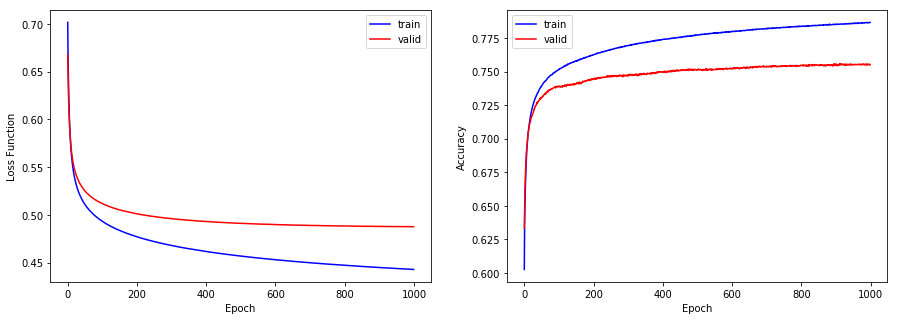

In [22]:
history(history_resnet50)

In [23]:
resnet50.load_weights('data/saved_models/weights_compare_resnet50.hdf5')

In [24]:
resnet50_predictions = (resnet50.predict(test_resnet50) >= 0.5).astype(int)

In [25]:
resnet50_score = f1_score(test_targets, resnet50_predictions)
print('F1 score: %.5f' % resnet50_score)

F1 score: 0.76972


## 4. InceptionV3
<a id="inception"></a> 

In [26]:
import numpy as np
from common import *

bottleneck_features = np.load('data/bottleneck_features/yelp_inception.npz')
train_inception = bottleneck_features['train_features']
valid_inception = bottleneck_features['valid_features']
test_inception = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

In [27]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

inception = Sequential()
inception.add(GlobalAveragePooling2D(input_shape=train_inception.shape[1:]))
inception.add(Dense(9, activation='sigmoid'))

inception.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 18441     
Total params: 18,441
Trainable params: 18,441
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
inception.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_compare_inception.hdf5', save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_inception = inception.fit(train_inception, train_targets, 
                                  validation_data=(valid_inception,valid_targets), 
                                  epochs=1000, batch_size=64, verbose=2,
                                  callbacks=[checkpointer,checkimprovement])

Train on 20000 samples, validate on 2000 samples
Epoch 1/1000
 - 2s - loss: 0.7182 - acc: 0.5811 - val_loss: 0.6770 - val_acc: 0.6159
Epoch 2/1000
 - 2s - loss: 0.6733 - acc: 0.6158 - val_loss: 0.6628 - val_acc: 0.6250
Epoch 3/1000
 - 2s - loss: 0.6596 - acc: 0.6243 - val_loss: 0.6508 - val_acc: 0.6324
Epoch 4/1000
 - 2s - loss: 0.6483 - acc: 0.6322 - val_loss: 0.6409 - val_acc: 0.6399
Epoch 5/1000
 - 2s - loss: 0.6387 - acc: 0.6397 - val_loss: 0.6326 - val_acc: 0.6443
Epoch 6/1000
 - 2s - loss: 0.6305 - acc: 0.6463 - val_loss: 0.6255 - val_acc: 0.6497
Epoch 7/1000
 - 2s - loss: 0.6234 - acc: 0.6521 - val_loss: 0.6196 - val_acc: 0.6544
Epoch 8/1000
 - 2s - loss: 0.6172 - acc: 0.6567 - val_loss: 0.6140 - val_acc: 0.6591
Epoch 9/1000
 - 2s - loss: 0.6118 - acc: 0.6619 - val_loss: 0.6091 - val_acc: 0.6634
Epoch 10/1000
 - 2s - loss: 0.6070 - acc: 0.6656 - val_loss: 0.6049 - val_acc: 0.6668
Epoch 11/1000
 - 2s - loss: 0.6027 - acc: 0.6687 - val_loss: 0.6012 - val_acc: 0.6699
Epoch 12/1000


Epoch 96/1000
 - 2s - loss: 0.5315 - acc: 0.7246 - val_loss: 0.5437 - val_acc: 0.7132
Epoch 97/1000
 - 2s - loss: 0.5313 - acc: 0.7248 - val_loss: 0.5436 - val_acc: 0.7134
Epoch 98/1000
 - 2s - loss: 0.5310 - acc: 0.7247 - val_loss: 0.5435 - val_acc: 0.7134
Epoch 99/1000
 - 2s - loss: 0.5308 - acc: 0.7249 - val_loss: 0.5434 - val_acc: 0.7133
Epoch 100/1000
 - 2s - loss: 0.5305 - acc: 0.7251 - val_loss: 0.5433 - val_acc: 0.7130
Epoch 101/1000
 - 2s - loss: 0.5303 - acc: 0.7255 - val_loss: 0.5431 - val_acc: 0.7134
Epoch 102/1000
 - 2s - loss: 0.5301 - acc: 0.7256 - val_loss: 0.5426 - val_acc: 0.7141
Epoch 103/1000
 - 2s - loss: 0.5299 - acc: 0.7258 - val_loss: 0.5426 - val_acc: 0.7137
Epoch 104/1000
 - 2s - loss: 0.5296 - acc: 0.7257 - val_loss: 0.5424 - val_acc: 0.7137
Epoch 105/1000
 - 2s - loss: 0.5294 - acc: 0.7259 - val_loss: 0.5422 - val_acc: 0.7139
Epoch 106/1000
 - 2s - loss: 0.5291 - acc: 0.7263 - val_loss: 0.5421 - val_acc: 0.7139
Epoch 107/1000
 - 2s - loss: 0.5289 - acc: 0.72

Epoch 191/1000
 - 2s - loss: 0.5157 - acc: 0.7366 - val_loss: 0.5339 - val_acc: 0.7211
Epoch 192/1000
 - 2s - loss: 0.5157 - acc: 0.7369 - val_loss: 0.5335 - val_acc: 0.7208
Epoch 193/1000
 - 2s - loss: 0.5155 - acc: 0.7371 - val_loss: 0.5332 - val_acc: 0.7212
Epoch 194/1000
 - 2s - loss: 0.5154 - acc: 0.7370 - val_loss: 0.5335 - val_acc: 0.7215
Epoch 195/1000
 - 2s - loss: 0.5153 - acc: 0.7369 - val_loss: 0.5333 - val_acc: 0.7222
Epoch 196/1000
 - 2s - loss: 0.5152 - acc: 0.7373 - val_loss: 0.5333 - val_acc: 0.7228
Epoch 197/1000
 - 2s - loss: 0.5151 - acc: 0.7373 - val_loss: 0.5333 - val_acc: 0.7211
Epoch 198/1000
 - 2s - loss: 0.5150 - acc: 0.7373 - val_loss: 0.5331 - val_acc: 0.7223
Epoch 199/1000
 - 2s - loss: 0.5149 - acc: 0.7374 - val_loss: 0.5330 - val_acc: 0.7227
Epoch 200/1000
 - 2s - loss: 0.5147 - acc: 0.7374 - val_loss: 0.5329 - val_acc: 0.7221
Epoch 201/1000
 - 2s - loss: 0.5146 - acc: 0.7375 - val_loss: 0.5328 - val_acc: 0.7219
Epoch 202/1000
 - 2s - loss: 0.5146 - acc: 

 - 2s - loss: 0.5075 - acc: 0.7427 - val_loss: 0.5293 - val_acc: 0.7241
Epoch 286/1000
 - 2s - loss: 0.5074 - acc: 0.7429 - val_loss: 0.5291 - val_acc: 0.7247
Epoch 287/1000
 - 2s - loss: 0.5074 - acc: 0.7431 - val_loss: 0.5292 - val_acc: 0.7249
Epoch 288/1000
 - 2s - loss: 0.5073 - acc: 0.7433 - val_loss: 0.5292 - val_acc: 0.7244
Epoch 289/1000
 - 2s - loss: 0.5072 - acc: 0.7430 - val_loss: 0.5290 - val_acc: 0.7248
Epoch 290/1000
 - 2s - loss: 0.5072 - acc: 0.7432 - val_loss: 0.5290 - val_acc: 0.7247
Epoch 291/1000
 - 2s - loss: 0.5071 - acc: 0.7431 - val_loss: 0.5290 - val_acc: 0.7249
Epoch 292/1000
 - 2s - loss: 0.5070 - acc: 0.7430 - val_loss: 0.5289 - val_acc: 0.7248
Epoch 293/1000
 - 2s - loss: 0.5070 - acc: 0.7434 - val_loss: 0.5289 - val_acc: 0.7249
Epoch 294/1000
 - 2s - loss: 0.5069 - acc: 0.7434 - val_loss: 0.5288 - val_acc: 0.7248
Epoch 295/1000
 - 2s - loss: 0.5068 - acc: 0.7434 - val_loss: 0.5289 - val_acc: 0.7256
Epoch 296/1000
 - 2s - loss: 0.5068 - acc: 0.7434 - val_lo

Epoch 380/1000
 - 2s - loss: 0.5020 - acc: 0.7467 - val_loss: 0.5268 - val_acc: 0.7263
Epoch 381/1000
 - 2s - loss: 0.5019 - acc: 0.7465 - val_loss: 0.5267 - val_acc: 0.7276
Epoch 382/1000
 - 2s - loss: 0.5019 - acc: 0.7467 - val_loss: 0.5267 - val_acc: 0.7277
Epoch 383/1000
 - 2s - loss: 0.5018 - acc: 0.7466 - val_loss: 0.5267 - val_acc: 0.7268
Epoch 384/1000
 - 2s - loss: 0.5018 - acc: 0.7468 - val_loss: 0.5266 - val_acc: 0.7271
Epoch 385/1000
 - 2s - loss: 0.5017 - acc: 0.7468 - val_loss: 0.5266 - val_acc: 0.7276
Epoch 386/1000
 - 2s - loss: 0.5017 - acc: 0.7468 - val_loss: 0.5266 - val_acc: 0.7274
Epoch 387/1000
 - 2s - loss: 0.5016 - acc: 0.7469 - val_loss: 0.5267 - val_acc: 0.7268
Epoch 388/1000
 - 2s - loss: 0.5016 - acc: 0.7470 - val_loss: 0.5266 - val_acc: 0.7280
Epoch 389/1000
 - 2s - loss: 0.5015 - acc: 0.7469 - val_loss: 0.5265 - val_acc: 0.7271
Epoch 390/1000
 - 2s - loss: 0.5015 - acc: 0.7472 - val_loss: 0.5265 - val_acc: 0.7277
Epoch 391/1000
 - 2s - loss: 0.5014 - acc: 

 - 2s - loss: 0.4979 - acc: 0.7491 - val_loss: 0.5253 - val_acc: 0.7287
Epoch 475/1000
 - 2s - loss: 0.4979 - acc: 0.7494 - val_loss: 0.5252 - val_acc: 0.7284
Epoch 476/1000
 - 2s - loss: 0.4979 - acc: 0.7492 - val_loss: 0.5254 - val_acc: 0.7283
Epoch 477/1000
 - 2s - loss: 0.4978 - acc: 0.7495 - val_loss: 0.5253 - val_acc: 0.7285
Epoch 478/1000
 - 2s - loss: 0.4978 - acc: 0.7495 - val_loss: 0.5252 - val_acc: 0.7284
Epoch 479/1000
 - 2s - loss: 0.4977 - acc: 0.7493 - val_loss: 0.5254 - val_acc: 0.7287
Epoch 480/1000
 - 2s - loss: 0.4977 - acc: 0.7496 - val_loss: 0.5252 - val_acc: 0.7288
Epoch 481/1000
 - 2s - loss: 0.4977 - acc: 0.7492 - val_loss: 0.5252 - val_acc: 0.7282
Epoch 482/1000
 - 2s - loss: 0.4976 - acc: 0.7497 - val_loss: 0.5251 - val_acc: 0.7282
Epoch 483/1000
 - 2s - loss: 0.4976 - acc: 0.7492 - val_loss: 0.5252 - val_acc: 0.7284
Epoch 484/1000
 - 2s - loss: 0.4976 - acc: 0.7495 - val_loss: 0.5252 - val_acc: 0.7283
Epoch 485/1000
 - 2s - loss: 0.4975 - acc: 0.7495 - val_lo

Epoch 569/1000
 - 2s - loss: 0.4947 - acc: 0.7517 - val_loss: 0.5243 - val_acc: 0.7292
Epoch 570/1000
 - 2s - loss: 0.4947 - acc: 0.7518 - val_loss: 0.5243 - val_acc: 0.7291
Epoch 571/1000
 - 2s - loss: 0.4946 - acc: 0.7518 - val_loss: 0.5243 - val_acc: 0.7294
Epoch 572/1000
 - 2s - loss: 0.4946 - acc: 0.7518 - val_loss: 0.5243 - val_acc: 0.7291
Epoch 573/1000
 - 2s - loss: 0.4946 - acc: 0.7519 - val_loss: 0.5244 - val_acc: 0.7293
Epoch 574/1000
 - 2s - loss: 0.4946 - acc: 0.7518 - val_loss: 0.5243 - val_acc: 0.7283
Epoch 575/1000
 - 2s - loss: 0.4945 - acc: 0.7517 - val_loss: 0.5242 - val_acc: 0.7289
Epoch 576/1000
 - 2s - loss: 0.4945 - acc: 0.7522 - val_loss: 0.5242 - val_acc: 0.7295
Epoch 577/1000
 - 2s - loss: 0.4945 - acc: 0.7521 - val_loss: 0.5242 - val_acc: 0.7284
Epoch 578/1000
 - 2s - loss: 0.4944 - acc: 0.7517 - val_loss: 0.5242 - val_acc: 0.7288
Epoch 579/1000
 - 2s - loss: 0.4944 - acc: 0.7519 - val_loss: 0.5242 - val_acc: 0.7288
Epoch 580/1000
 - 2s - loss: 0.4944 - acc: 

 - 2s - loss: 0.4921 - acc: 0.7537 - val_loss: 0.5236 - val_acc: 0.7293
Epoch 664/1000
 - 2s - loss: 0.4921 - acc: 0.7536 - val_loss: 0.5235 - val_acc: 0.7292
Epoch 665/1000
 - 2s - loss: 0.4920 - acc: 0.7537 - val_loss: 0.5236 - val_acc: 0.7292
Epoch 666/1000
 - 2s - loss: 0.4920 - acc: 0.7539 - val_loss: 0.5238 - val_acc: 0.7293
Epoch 667/1000
 - 2s - loss: 0.4920 - acc: 0.7536 - val_loss: 0.5236 - val_acc: 0.7293
Epoch 668/1000
 - 2s - loss: 0.4920 - acc: 0.7538 - val_loss: 0.5236 - val_acc: 0.7292
Epoch 669/1000
 - 2s - loss: 0.4919 - acc: 0.7537 - val_loss: 0.5237 - val_acc: 0.7293
Epoch 670/1000
 - 2s - loss: 0.4919 - acc: 0.7537 - val_loss: 0.5235 - val_acc: 0.7294
Epoch 671/1000
 - 2s - loss: 0.4919 - acc: 0.7538 - val_loss: 0.5234 - val_acc: 0.7292
Epoch 672/1000
 - 2s - loss: 0.4918 - acc: 0.7539 - val_loss: 0.5236 - val_acc: 0.7292
Epoch 673/1000
 - 2s - loss: 0.4918 - acc: 0.7538 - val_loss: 0.5236 - val_acc: 0.7288
Epoch 674/1000
 - 2s - loss: 0.4918 - acc: 0.7541 - val_lo

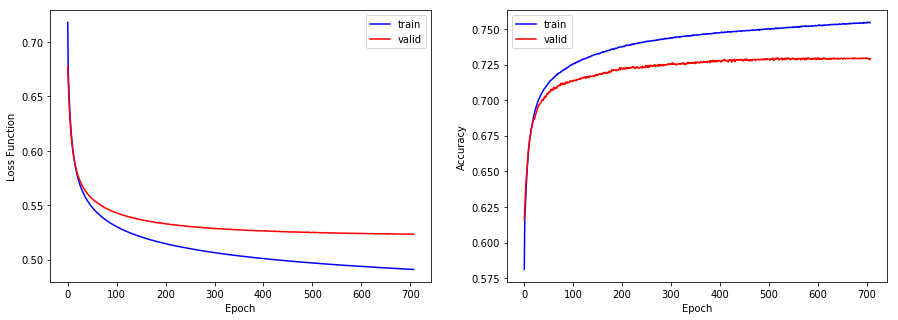

In [30]:
history(history_inception)

In [31]:
inception.load_weights('data/saved_models/weights_compare_inception.hdf5')

In [32]:
inception_predictions = (inception.predict(test_inception) >= 0.5).astype(int)

In [33]:
inception_score = f1_score(test_targets, inception_predictions)
print('F1 score: %.5f' % inception_score)

F1 score: 0.74310
